# Mapa de Puntos
Gráfico que muestra en un espacio geográfico la distribución de puntos de interés. Su objetivo es mostrar como se distribuyen mis entidades de interés (estaciones, casos médicos, edificios, etc) a lo largo de un espacio geográfico (mapa). Para poder graficarlo necesito la posición geográfica de cada punto.     

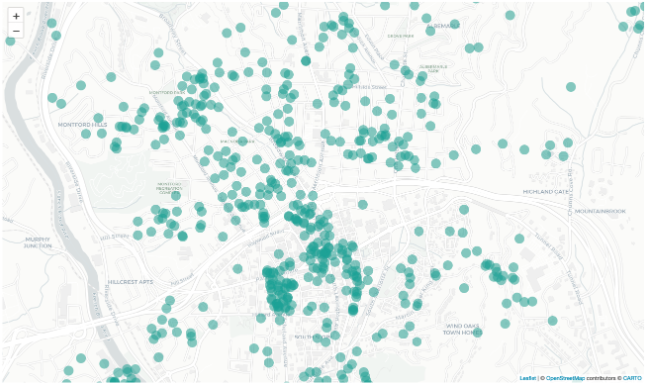


### Que necesito para hacer un Mapa de Puntos?
- Necesito un archivo en donde mis registros tengan coordenadas geográficas en cualquier formato. 

### Consejos
- Puedo introducir una o más variable al gráfico con las siguientes técticas:
  - Diferentes formas en los "puntos" para introducir una variable categórica. 
  - Convertir los puntos en burbujas de diferentes tamaños para introducir una variable numérica. Esto es un **Mapa de Burbujas**.
  - Jugar con la intensidad del color de cada punto para introducir una variable numérica.
- Si conecto los puntos con líneas por alguna relación que estos tengan, o por algún movimiento, se convierte en un Mapa de Conecciones o Flujo
- Si tengo una alta densidad de puntos, y empiezo a ver solo manchas, puedo considerar utilizar un HeatMap Geográfico, o hacer agrupación de puntos.

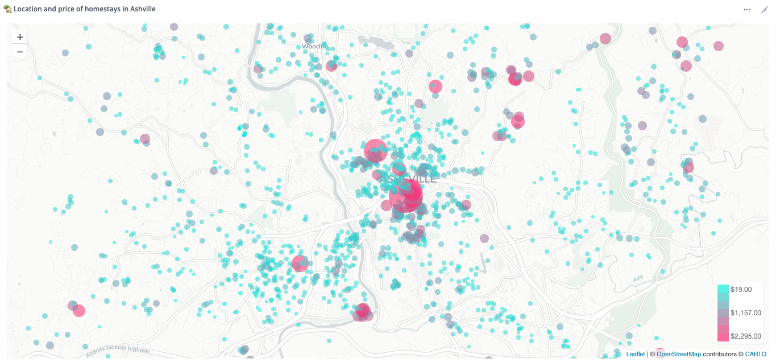

## En esta clase
### Datos
Información sobre las estaciones de Metros en madrid
### Objetivos
1. Encontrar como estan distribuidas las estaciones de metro a lo largo de madrid

## Referencias
- https://datavizcatalogue.com/ES/metodos/mapa_de_puntos.html
- https://datavizcatalogue.com/ES/metodos/mapa_de_burbujas.html

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

# Algunos ambientes van a necesitar este modo para poder visualizar los graficos de Plotly
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [2]:
# Leemos los datos con Pandas
df = pd.read_csv('../data/madrid_metro/estaciones.csv', index_col='OBJECTID')
df[['latitude', 'longitude', 'DENOMINACION', 'CODIGOESTACION']]

,latitude,longitude,DENOMINACION,CODIGOESTACION
OBJECTID,,,,
1,40.424842,-3.707419,NOVICIADO,38
2,40.411472,-3.661785,ESTRELLA,175
3,40.441975,-3.701328,RIOS ROSAS,7
4,40.394808,-3.768128,CAMPAMENTO,102
5,40.387097,-3.706896,USERA,109
...,...,...,...,...
285,40.433158,-3.689542,RUBEN DARIO,84
286,40.429056,-3.702182,BILBAO,9
287,40.397356,-3.715960,MARQUES DE VADILLO,94


In [3]:
estaciones = df.groupby('DENOMINACION').agg({
    'latitude': 'first',
    'longitude': 'first',
    'DISTRITO': 'first',
    'ENCUESTADOMICILIARIA': np.sum,
    'GRADOACCESIBILIDAD': 'first'
})
estaciones = estaciones.reset_index()
estaciones

,DENOMINACION,latitude,longitude,DISTRITO,ENCUESTADOMICILIARIA,GRADOACCESIBILIDAD
0,ABRANTES,40.380834,-3.727900,11,296,T
1,ACACIAS,40.403872,-3.706641,2,28,N
2,AEROPUERTO T1 T2 T3,40.468644,-3.569538,21,585,T
3,AEROPUERTO T4,40.491767,-3.593246,21,585,T
4,ALAMEDA DE OSUNA,40.457789,-3.587521,21,581,T
...,...,...,...,...,...,...
236,VILLA DE VALLECAS,40.379599,-3.621296,18,500,T
237,VILLAVERDE ALTO,40.341229,-3.711990,17,484,T
238,VILLAVERDE BAJO CRUCE,40.350895,-3.692649,17,481,T
239,VINATEROS,40.410240,-3.652734,14,380,N


In [4]:
# Mapa de Puntos
# https://plotly.com/python/scattermapbox/
# https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter_mapbox.html

fig = px.scatter_mapbox(
    estaciones, 
    lat="latitude", 
    lon="longitude",     
    mapbox_style="stamen-watercolor", 
    zoom=10,
    hover_name="DENOMINACION"
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [5]:
# Mapa de Puntos
# https://plotly.com/python/scattermapbox/
# https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter_mapbox.html

fig = px.scatter_mapbox(
    estaciones, 
    lat="latitude", 
    lon="longitude",     
    mapbox_style="carto-positron", 
    zoom=10,
    hover_name="DENOMINACION",
    text='GRADOACCESIBILIDAD',
    color="ENCUESTADOMICILIARIA", 
    color_continuous_scale='matter',
)
fig.update_traces(
    marker=dict(
        size=12,
    )
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [6]:
# Mapa de Burbujas
# https://plotly.com/python/scattermapbox/
# https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter_mapbox.html

fig = px.scatter_mapbox(
    estaciones, 
    lat="latitude", 
    lon="longitude",     
    color="GRADOACCESIBILIDAD", 
    size="ENCUESTADOMICILIARIA",
    size_max=20, 
    mapbox_style="carto-positron", 
    zoom=10,
    text='GRADOACCESIBILIDAD'
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()